https://www.kaggle.com/c/bike-sharing-demand/ # 캐글
https://didu-story.tistory.com/43?category=937100  # 블로그설명

# 목표) 특정 시간에 얼마나 많은 사람들이 자전거를 대여하는지 예측

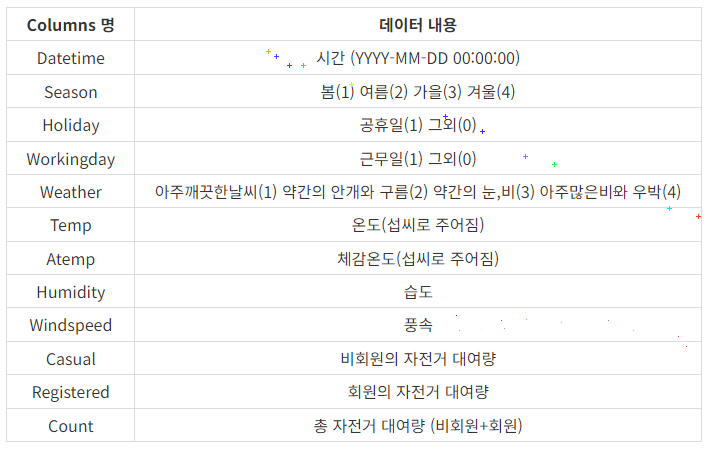

In [ ]:
# train, test가 이미 나누어져있음 ! train_test_split 실행할 필요X
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스9회차I반/(연습)데이터분석프로젝트/train.csv')
test =  pd.read_csv('/content/drive/MyDrive/멀티캠퍼스9회차I반/(연습)데이터분석프로젝트/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스9회차I반/(연습)데이터분석프로젝트/sampleSubmission.csv')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# 최종 제출 형식 이런식으로 하기
submission.head(10)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
5,2011-01-20 05:00:00,0
6,2011-01-20 06:00:00,0
7,2011-01-20 07:00:00,0
8,2011-01-20 08:00:00,0
9,2011-01-20 09:00:00,0


In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

# train 데이터에는 casual, registerd, count정보가 더 담겨있다.
> 우리는 이 셋을 예측하면된다.
c+r = count를 예측하면 된다!

In [ ]:
# datetime을 날짜로 인식해주자.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# pd.to_datetime()

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
print(train.shape, test.shape)

(10886, 12) (6493, 9)


# EDA진행
https://eda-ai-lab.tistory.com/13 참고

데이터를 탐색적(그래프, 시각화해서 더 잘이해하기)으로 분석하는 방법

In [ ]:
# datetime 사용하기
import datetime as dt

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# dayofweek 요일 가져오기!⭐
# 0123456 순서로 월화수목금토일
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

test['dayofweek'] = test['datetime'].dt.dayofweek

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [ ]:
train.groupby('year')['count'].sum()

year
2011     781979
2012    1303497
Name: count, dtype: int64

In [ ]:
train.groupby('year')['count'].sum().index

Int64Index([2011, 2012], dtype='int64', name='year')

In [ ]:
train.groupby('year')['count'].sum().values

array([ 781979, 1303497])

In [ ]:
# 왜 seaborn으로 할때랑 값이 다르지..?
# 찾았다! seaborn barplot은 막대 높이 구할때 디폴트값으로 mean을 적용하기 때문!

train.groupby('year')['count'].mean().values

array([144.22334932, 238.56094436])

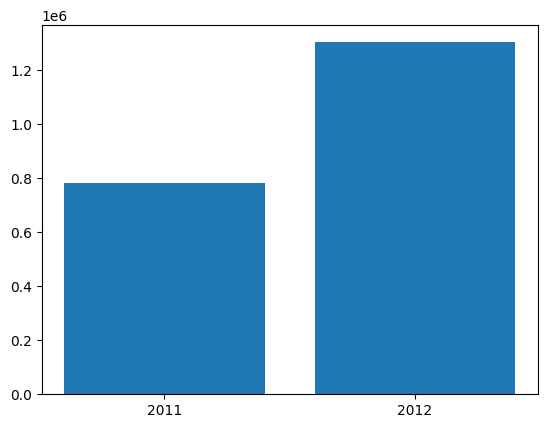

In [ ]:
# matplotlib으로 그려도되고
plt.bar(train.groupby('year')['count'].sum().index, train.groupby('year')['count'].sum().values)
plt.xticks([2011,2012])
plt.show()

<Axes: xlabel='year', ylabel='count'>

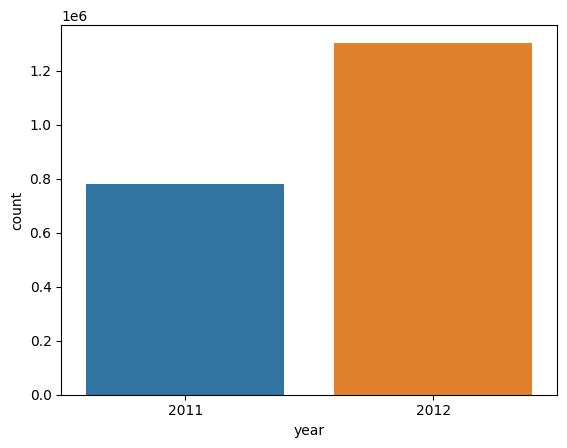

In [ ]:
# seaborn으로 그려도됨
import seaborn as sns
sns.barplot(data = train.groupby('year')['count'].sum().reset_index(), x='year', y = 'count')

<Axes: xlabel='year', ylabel='count'>

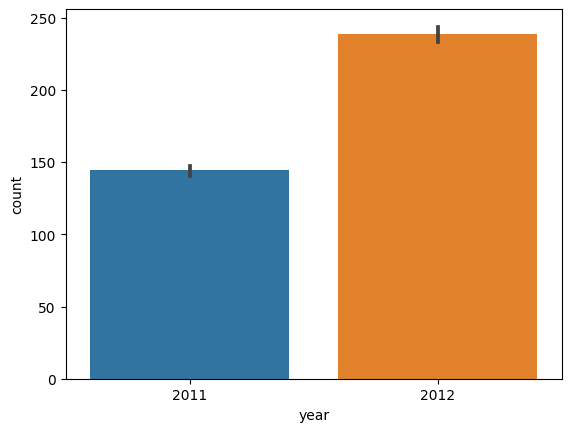

In [ ]:
sns.barplot(data =train, x='year', y = 'count')

2011> 2012년으로 갈 때 수요가 증가했다. 하지만 단 두개의 year만 존재하기 때문에 지속적으로 수요가 증가하는지에 대한 여부는 알 수 없고, 단지 해당 자전거 대여 회사가 성장했다 or 자전거 수요가 늘었다. 까지만 알 수 있다.

2012년에 갑자기 자전거가 대유행해서 , 2013년에는 줄어들수도,,, 늘어날수도 있다는 것!

어쨌든 주어진 데이터 내에서는 분명히 년도별로 수요량의 차이가 존재함을 알 수 있다. 따라서 예측하는데 year변수를 사용할 수는 있겠다.

<Axes: xlabel='month', ylabel='count'>

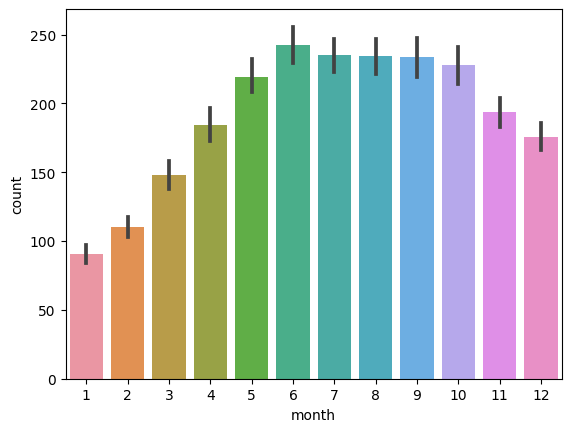

In [ ]:
# month
sns.barplot(data =train, x='month', y = 'count')

- 12월 특히 1,2월이 추워서그런가 수요량이 제일 적었음

- 6,7,8,9가 젤 많음!

<Axes: xlabel='day', ylabel='count'>

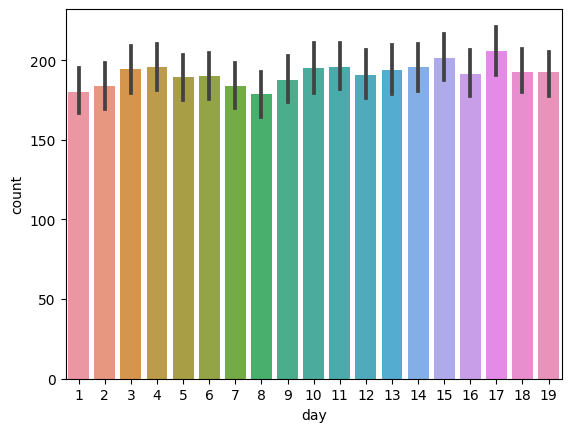

In [ ]:
# day
sns.barplot(data =train, x='day', y = 'count')

# day는 다비슷비슷하고 오르락내리락 규칙이 딱히 없어서 도움은 안될듯. 오히려 제거해야할수도

<Axes: xlabel='hour', ylabel='count'>

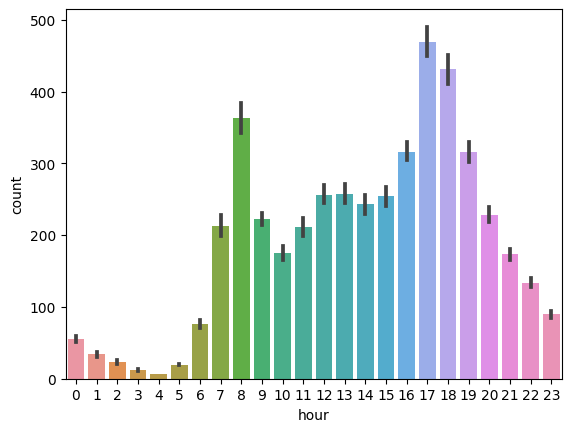

In [ ]:
# hour
sns.barplot(data =train, x='hour', y = 'count')

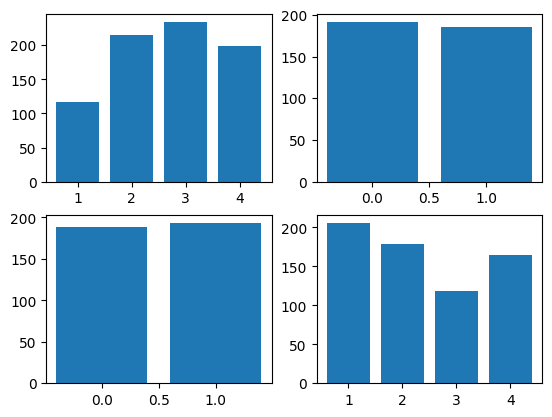

In [ ]:
# 계절, 휴일, 작업일, 날씨 별(subplots연습위해 한번에 나타내어보기! )
fig, ax = plt.subplots(2,2)

ax[0,0].bar(train.groupby('season')['count'].mean().index, train.groupby('season')['count'].mean().values)

ax[0,1].bar(train.groupby('holiday')['count'].mean().index, train.groupby('holiday')['count'].mean().values)

ax[1,0].bar(train.groupby('workingday')['count'].mean().index, train.groupby('workingday')['count'].mean().values)

ax[1,1].bar(train.groupby('weather')['count'].mean().index, train.groupby('weather')['count'].mean().values)

plt.show()

# 주의! 위에서 12,1,2(겨울)이 수요량 적었는데, 이 그래프에서는 4(겨울)이 최소가아니다!

아마 타국이라 시차때문에 그런듯

In [ ]:
train.loc[train['season'] == 1, 'month'].unique()
# season은 1월을 봄으로 분류했음

array([1, 2, 3])

In [ ]:
train.loc[train['season'] == 2, 'month'].unique()

array([4, 5, 6])

In [ ]:
train.loc[train['season'] == 3, 'month'].unique()

array([7, 8, 9])

In [ ]:
train.loc[train['season'] == 4, 'month'].unique()

array([10, 11, 12])

# 이런것도 잘 확인해줘야할듯!!
- 아래는 다른 회원의 풀이인데 데이터를 바꿔주는 방법도 있긴하다

In [ ]:
def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

<Axes: xlabel='hour', ylabel='count'>

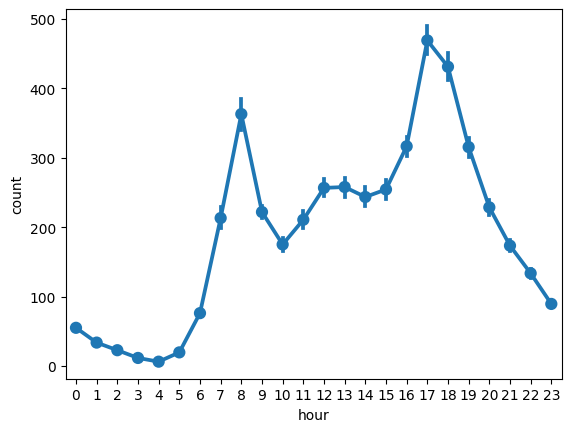

In [ ]:
# 시간대별
sns.pointplot(data=train, x='hour', y='count')

<Axes: xlabel='hour', ylabel='count'>

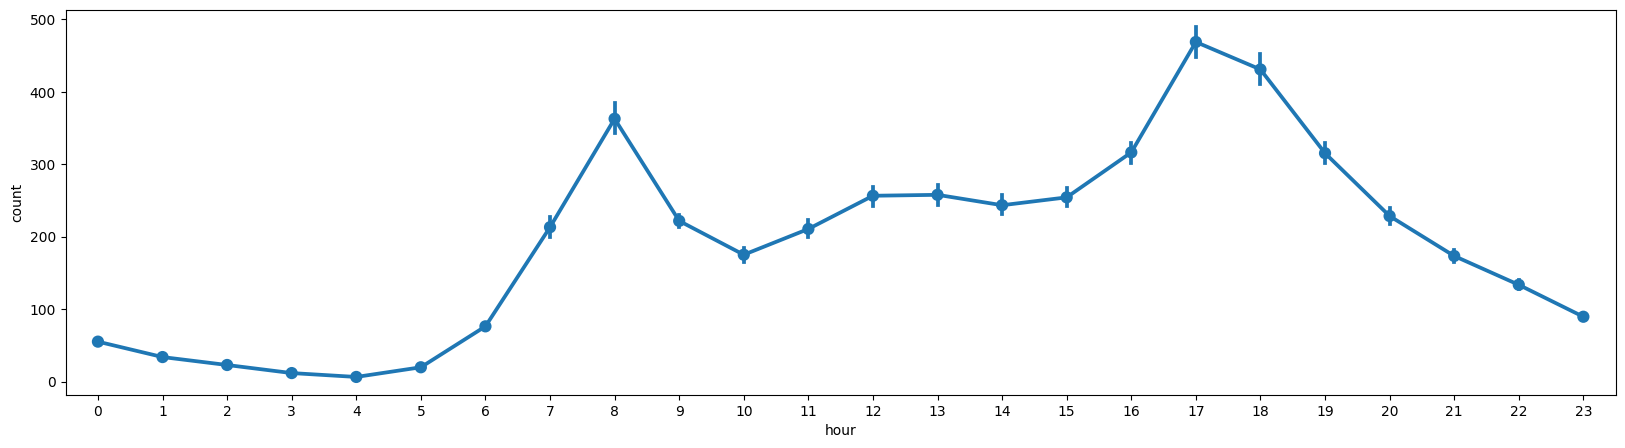

In [ ]:
plt.figure(figsize = (20,5))
sns.pointplot(data=train, x='hour', y='count')

# 시간대별로 봤을 때, 출퇴근시간 압도적으로 수요많음!

<Axes: xlabel='hour', ylabel='count'>

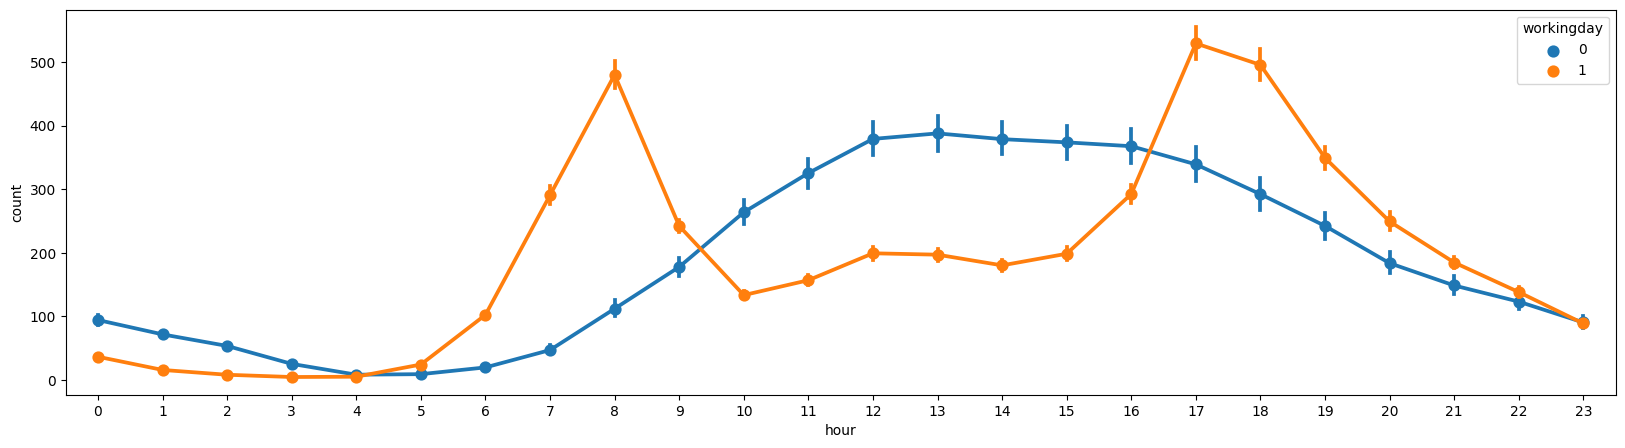

In [ ]:
# hue변수로 카테고리 나누어서 보기!
plt.figure(figsize = (20,5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

# 주황(1) 근무일 / 파랑(0) 근무일아님

확실히 일갈때 출퇴근시간 뚜렷하게나타남

일안가면 출퇴근시간에 탈필요가 없으므로 10~16시에 많이탐(오후시간)

<Axes: xlabel='hour', ylabel='count'>

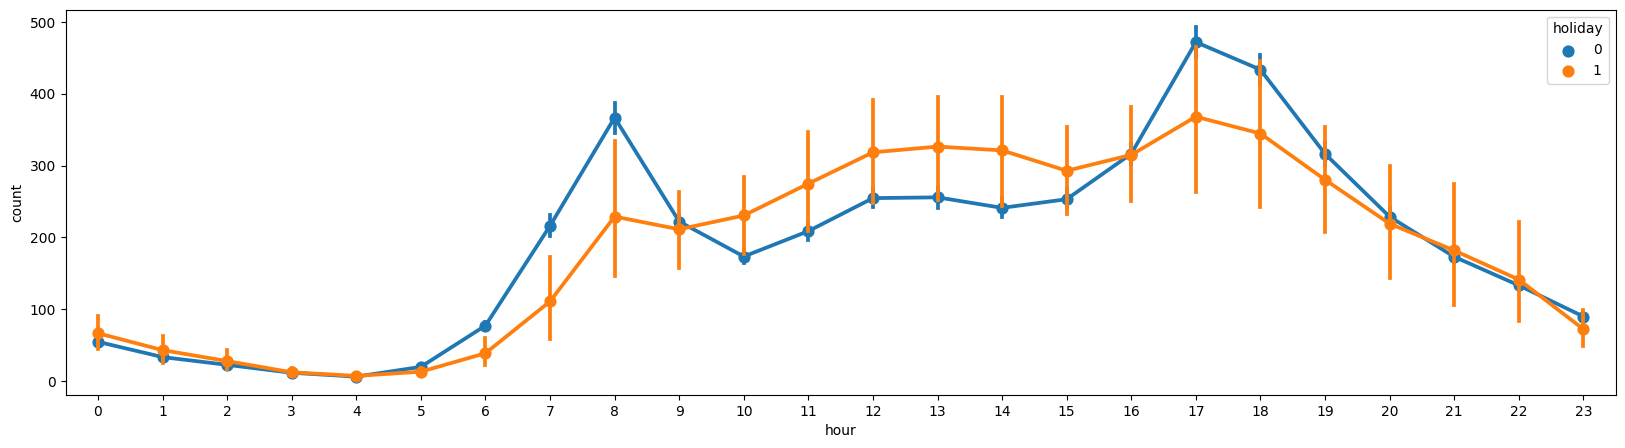

In [ ]:
plt.figure(figsize = (20,5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday')

# 주황(1) 휴일 / 파랑(0) 휴일아님
마찬가지로 휴일아닐때 출퇴근시간수요가 뚜렷하게 잘보임

휴일이면 비슷하게 오후시간대에 높게탐

<Axes: xlabel='hour', ylabel='count'>

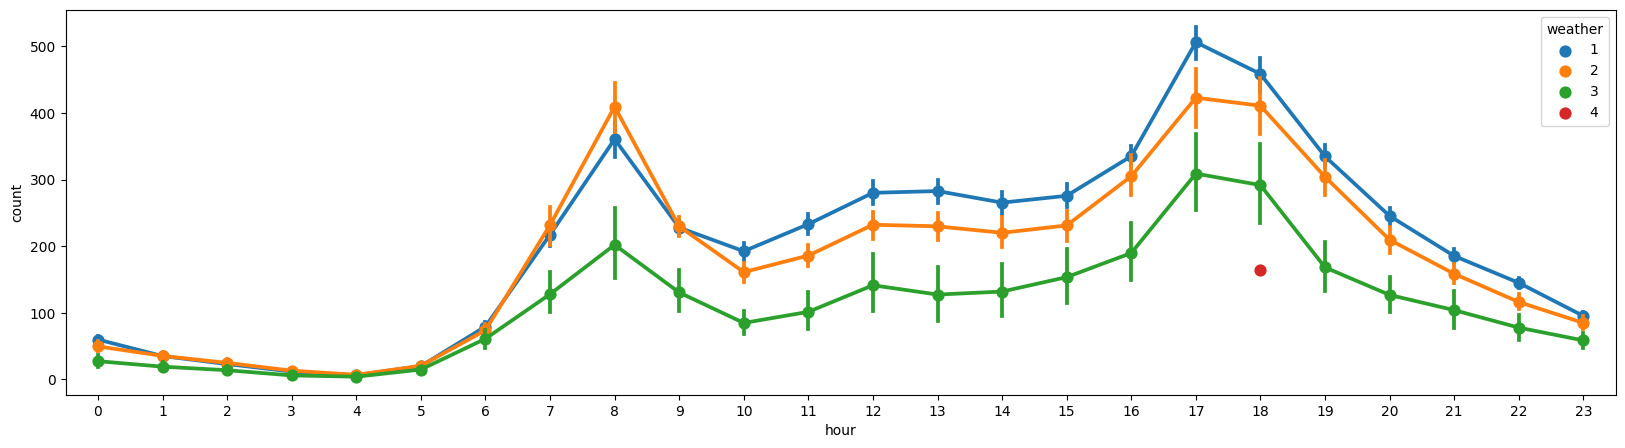

In [ ]:
plt.figure(figsize = (20,5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

날씨가 좋을수록 많이탐!

<Axes: xlabel='hour', ylabel='count'>

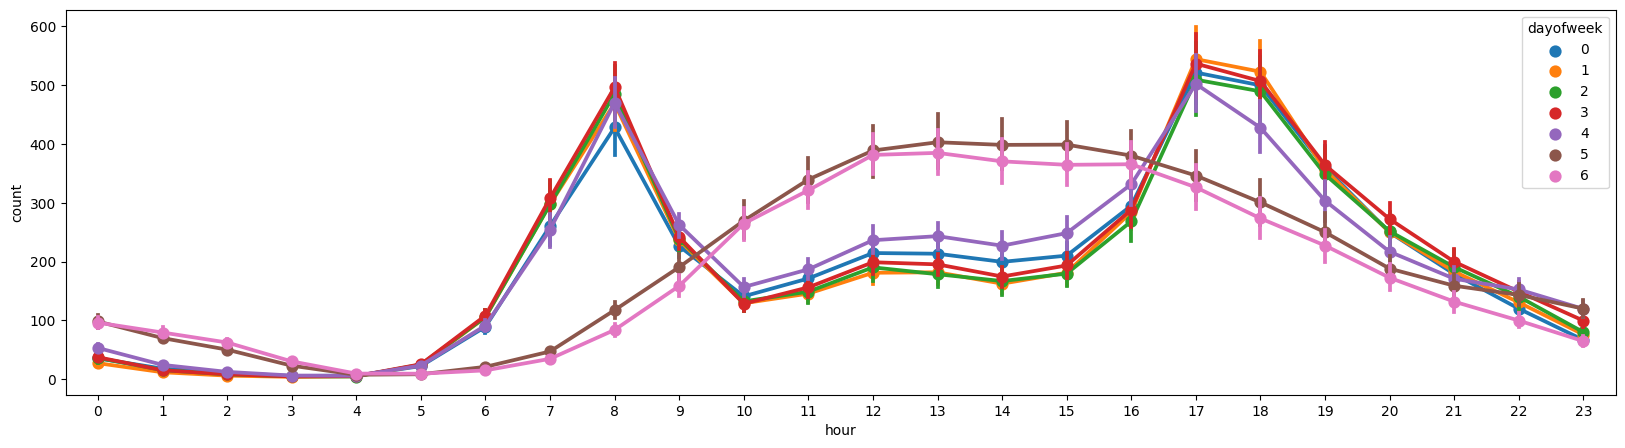

In [ ]:
plt.figure(figsize = (20,5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')

# 날짜별로는 딱히 선명한 차이는 없는듯하다
월화수목금 / 토일
즉, 평일 주말(근무일, 근무일아님)으로 예측은 해볼수 있다!

# 변수끼리의 상관관계⭐


<ipython-input-35-a10bae6f3761>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train[corr_data].corr(), square = True, annot = True)


<Axes: >

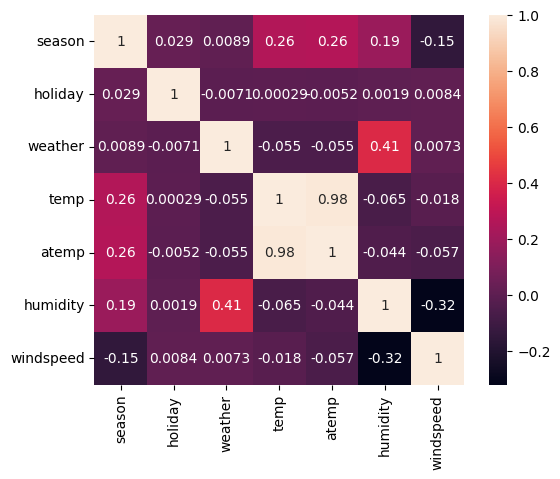

In [ ]:
corr_data = ['datetime', 'season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
sns.heatmap(train[corr_data].corr(), square = True, annot = True)

# 0.98값!! temp 와 atemp상관관계가 매우 높다.
다중공산성때문에 하나 제거해줄 것

# 연속형 변수 살펴보자

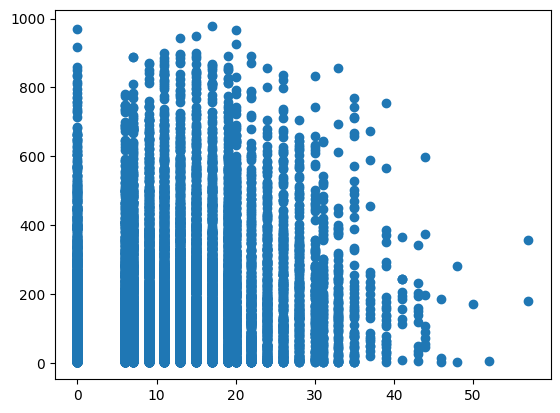

In [ ]:
plt.scatter(train['windspeed'],train['count'])
plt.show()

# sns.scatterplot으로 그려도됨!
# sns.scatterplot(data = train, x = 'windspeed', y = 'count')

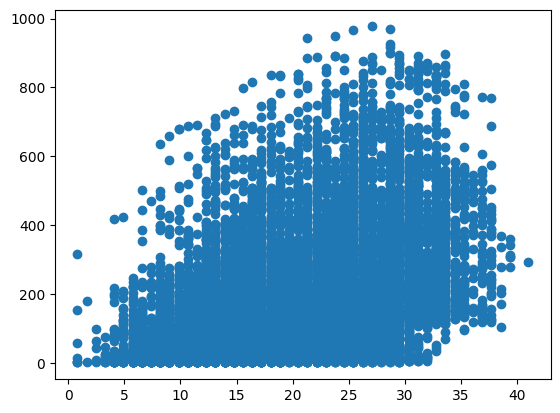

In [ ]:
plt.scatter(train['temp'],train['count'])
plt.show()

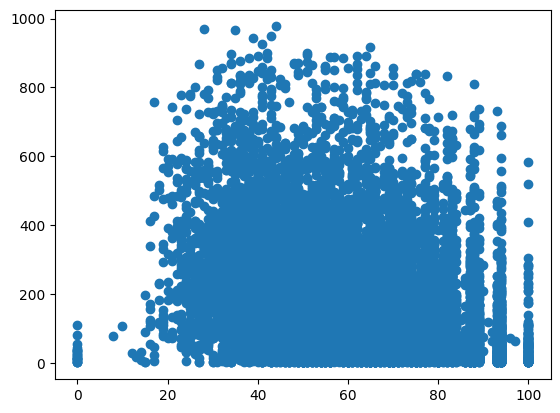

In [ ]:
plt.scatter(train['humidity'],train['count'])
plt.show()

In [ ]:
len(train.loc[train['windspeed'] == 0])

1313

# 이상치 찾는 것도 분석실력!
바람세기가 0인경우는 거의 없는데 10000여개중 1313개면 많은 부분의 이상치다. feature engineering해주어야

1. 데이터의 왜도와 첨도를 살펴보고 조절해 줄것이고
2. IQR방법으로 이상치를 제거해 준 후
3. 앞서 언급했던 windspeed 에 대한 feature engineering을 진행할 것이다.

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea2f3cef010>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea2f3cef970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea2f3cedb70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea2f5aa42e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea2f5aa4df0>],
 'means': []}

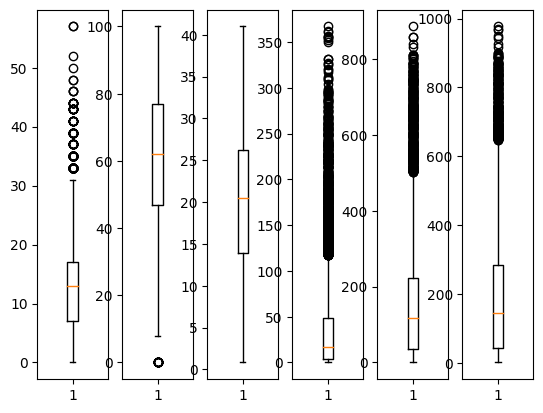

In [ ]:
# boxplot으로 이상치 확인
fig, ax = plt.subplots(1,6)
ax[0].boxplot(data = train, x = 'windspeed')
ax[1].boxplot(data = train, x = 'humidity')
ax[2].boxplot(data = train, x = 'temp')
ax[3].boxplot(data = train, x = 'casual')
ax[4].boxplot(data = train, x = 'registered')
ax[5].boxplot(data = train, x = 'count')

# IQR = q3-q1
이상치는 q1-1.5IQR 과 q3+1.5IQR 바깥범위들!

In [ ]:
from collections import Counter

def detect_outliers(data, n, cols):
  outlier_indices = [] # 이상치 인덱스를 담을 리스트
  for col in cols:
    Q1 = np.percentile(data[col], 25) # np.percentile이용해서 25%, 75%지점 값 찾아주기
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1

    step = 1.5 * IQR
    # or로쓰면 오류나고 |로쓰면 되네..?
    outlier_list_col = data[(data[col] < Q1 - step) | (data[col] > Q3 + step)].index
    outlier_indices.extend(outlier_list_col)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(k for k,v in outlier_indices.items() if v > n)
# 모든 for문 다돌고 다 찾은 이상치총개수로 따지는거라 multiple
  return multiple_outliers

In [ ]:
Q1 = np.percentile(train['windspeed'], 25) # np.percentile이용해서 25%, 75%지점 값 찾아주기
Q3 = np.percentile(train['windspeed'], 75)
IQR = Q3 - Q1
step = 1.5 * IQR

outlier_list_col = train[(train['windspeed'] < Q1 - step) | (train['windspeed'] > Q3 + step)]
outlier_list_col

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95,2011,1,8,14,0,0,5
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69,2011,1,8,17,0,0,5
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19,2011,1,9,9,0,0,6
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49,2011,1,9,11,0,0,6
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55,2011,1,12,12,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262,2012,11,2,14,0,0,4
10154,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235,2012,11,8,12,0,0,3
10263,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5,2012,11,13,1,0,0,1
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218,2012,12,5,14,0,0,2


In [ ]:
outlier_indices = []
outlier_indices.extend(outlier_list_col.index)
outlier_indices = Counter(outlier_indices)
outlier_indices

Counter({175: 1,
         178: 1,
         194: 1,
         196: 1,
         265: 1,
         271: 1,
         471: 1,
         472: 1,
         473: 1,
         474: 1,
         479: 1,
         604: 1,
         605: 1,
         606: 1,
         608: 1,
         612: 1,
         613: 1,
         705: 1,
         749: 1,
         750: 1,
         752: 1,
         753: 1,
         754: 1,
         756: 1,
         757: 1,
         758: 1,
         760: 1,
         761: 1,
         762: 1,
         848: 1,
         850: 1,
         853: 1,
         860: 1,
         861: 1,
         862: 1,
         863: 1,
         864: 1,
         865: 1,
         866: 1,
         867: 1,
         868: 1,
         869: 1,
         870: 1,
         873: 1,
         874: 1,
         875: 1,
         919: 1,
         920: 1,
         923: 1,
         924: 1,
         929: 1,
         1015: 1,
         1017: 1,
         1022: 1,
         1023: 1,
         1108: 1,
         1151: 1,
         1307: 1,
       

In [ ]:
outlier_indices.items()

dict_items([(175, 1), (178, 1), (194, 1), (196, 1), (265, 1), (271, 1), (471, 1), (472, 1), (473, 1), (474, 1), (479, 1), (604, 1), (605, 1), (606, 1), (608, 1), (612, 1), (613, 1), (705, 1), (749, 1), (750, 1), (752, 1), (753, 1), (754, 1), (756, 1), (757, 1), (758, 1), (760, 1), (761, 1), (762, 1), (848, 1), (850, 1), (853, 1), (860, 1), (861, 1), (862, 1), (863, 1), (864, 1), (865, 1), (866, 1), (867, 1), (868, 1), (869, 1), (870, 1), (873, 1), (874, 1), (875, 1), (919, 1), (920, 1), (923, 1), (924, 1), (929, 1), (1015, 1), (1017, 1), (1022, 1), (1023, 1), (1108, 1), (1151, 1), (1307, 1), (1313, 1), (1380, 1), (1409, 1), (1410, 1), (1411, 1), (1412, 1), (1413, 1), (1415, 1), (1423, 1), (1427, 1), (1428, 1), (1433, 1), (1437, 1), (1440, 1), (1456, 1), (1577, 1), (1578, 1), (1579, 1), (1582, 1), (1595, 1), (1601, 1), (1674, 1), (1694, 1), (1695, 1), (1696, 1), (1697, 1), (1699, 1), (1721, 1), (1838, 1), (1839, 1), (1840, 1), (1853, 1), (1887, 1), (1889, 1), (2268, 1), (2274, 1), (2275

In [ ]:
# 아래 column들에 대해 이상치 제거해줄건데, 지정한값 n= 2개보다 많으면 제거
Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])
Outliers_to_drop

[6658,
 6779,
 6825,
 6849,
 6850,
 6897,
 7088,
 7640,
 7641,
 7664,
 7881,
 8002,
 8024,
 8048,
 8049,
 8456,
 8768,
 8793,
 8794,
 8962,
 8984,
 8986,
 9008,
 9243,
 9244,
 9267,
 9296,
 9320,
 9392,
 9632,
 9652,
 9655,
 9800,
 9920,
 7017,
 7473,
 7991,
 8000,
 8528,
 9479]

In [ ]:
# 이상치 제거전
train.shape

(10886, 19)

In [ ]:
# 이상치 제거
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)
train.shape

(10846, 19)

# 왜도(skewness)와 첨도(kurtosis)확인!
왜도 : 데이터의 분포가 한쪽으로 쏠린 것
-skew -2~ +2 사이에 있어야 치우침이 없는 좋은 데이터
- -2이하 = 왼쪽으로 쏠린 데이터(negative)
- +2이상 = 오른쪽으로 쏠린 데이터(positive)

첨도 : 뾰족하다는 개념 뿐 아니라 tail에 관한 개념이다.
- 한쪽 꼬리부분의 극값과 다른쪽 꼬리의 극값의 차이를 보여줌
- outlier 찾을때 주로 사용
- 첨도가 높다 = outlier가 많다.

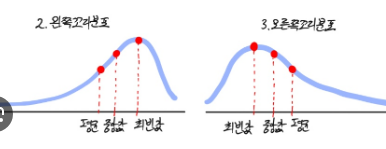

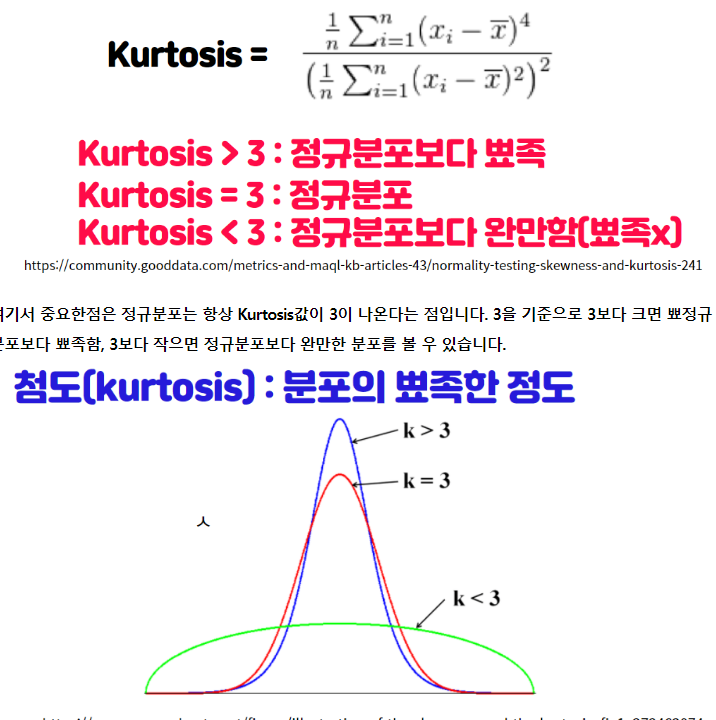

<ipython-input-76-5bd2c4e5bdd4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(train['count'])


skewness(왜도): 1.2109229742605938
kurtosis(첨도): 1.2008710894377526


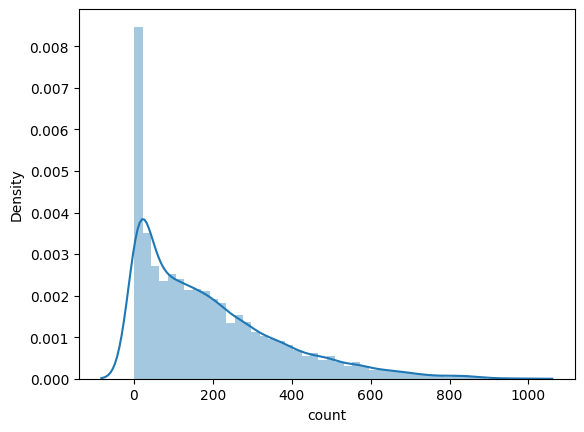

In [ ]:
# skew() 왜도
# kurt() 첨도

graph = sns.distplot(train['count'])


print('skewness(왜도): {}'.format(train['count'].skew()))
print('kurtosis(첨도): {}'.format(train['count'].kurt()))

<ipython-input-129-f695c7f0f760>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(train['count_log'])


skewness(왜도): 1.2109229742605938
kurtosis(첨도): 1.2008710894377526


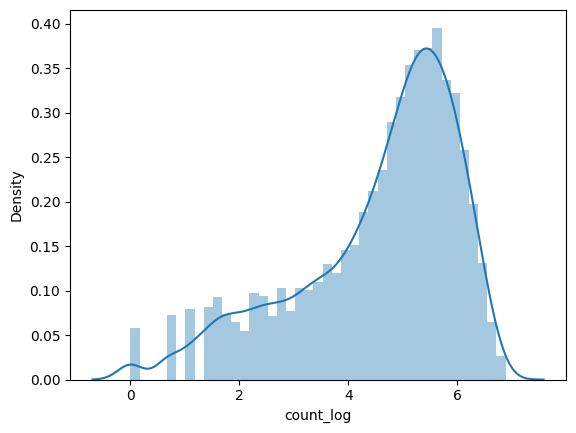

In [ ]:
# 왜도 첨도 수치상으론 문제 없지만 덜 치우치게 log로 정규화해주기
train['count_log'] = train['count'].map(lambda i : np.log(i) if i > 0 else 0)

graph = sns.distplot(train['count_log'])


print('skewness(왜도): {}'.format(train['count'].skew()))
print('kurtosis(첨도): {}'.format(train['count'].kurt()))

# 아까 windspeed = 0인것 대체값 찾을건데
어떻게 찾지?
무작정 지우지말고 예측된 값으로 다시 채워보자

In [ ]:
# randomforest 써봐야지!
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
  # 풍속이 0인데이터
  wind0 = data.loc[data['windspeed'] == 0]
  # 풍속이 0이데이터
  windnot0 = data.loc[data['windspeed'] != 0]

  #풍속이 날씨변수이기 때문에 관련된 날씨변수를 활용해서 windspeed를 예측해줄 것
  col = ['season', 'weather', 'temp', 'humidity', 'atemp']
  windnot0['windspeed'] = windnot0['windspeed'].astype('str')

  rf = RandomForestClassifier()
  # fit(X_train, y_train)
  # 풍속이 0이 아니었을 때 데이터로 모델을 훈련시킴!⭐⭐⭐
  rf.fit(windnot0[col], windnot0['windspeed'])

  # 이제 predict(X_test) 풍속이0인것들을 가지고 풍속이 얼마일지 예측함!(0대신 쓰기위해서)
  pred_wind0 = rf.predict(wind0[col])

  # 0대신 예측된 값으로 대체해주기
  wind0['windspeed'] = pred_wind0

  #windnot0과 wind0을 합쳐준다
  data = windnot0.append(wind0)
  data['windspeed'] = data['windspeed'].astype('float')

  data.reset_index(inplace = True)
  data.drop("index", inplace = True, axis = 1)

  return data

In [ ]:
train = predict_windspeed(train)
test = predict_windspeed(test)

<ipython-input-103-63376e080937>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnot0['windspeed'] = windnot0['windspeed'].astype('str')
<ipython-input-103-63376e080937>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred_wind0
<ipython-input-103-63376e080937>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = windnot0.append(wind0)
<ipython-input-103-63376e080937>:12: SettingWithCopy

In [ ]:
# 잘지워졌는지 확인
train[train['windspeed'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,count_log


<Axes: xlabel='windspeed', ylabel='count'>

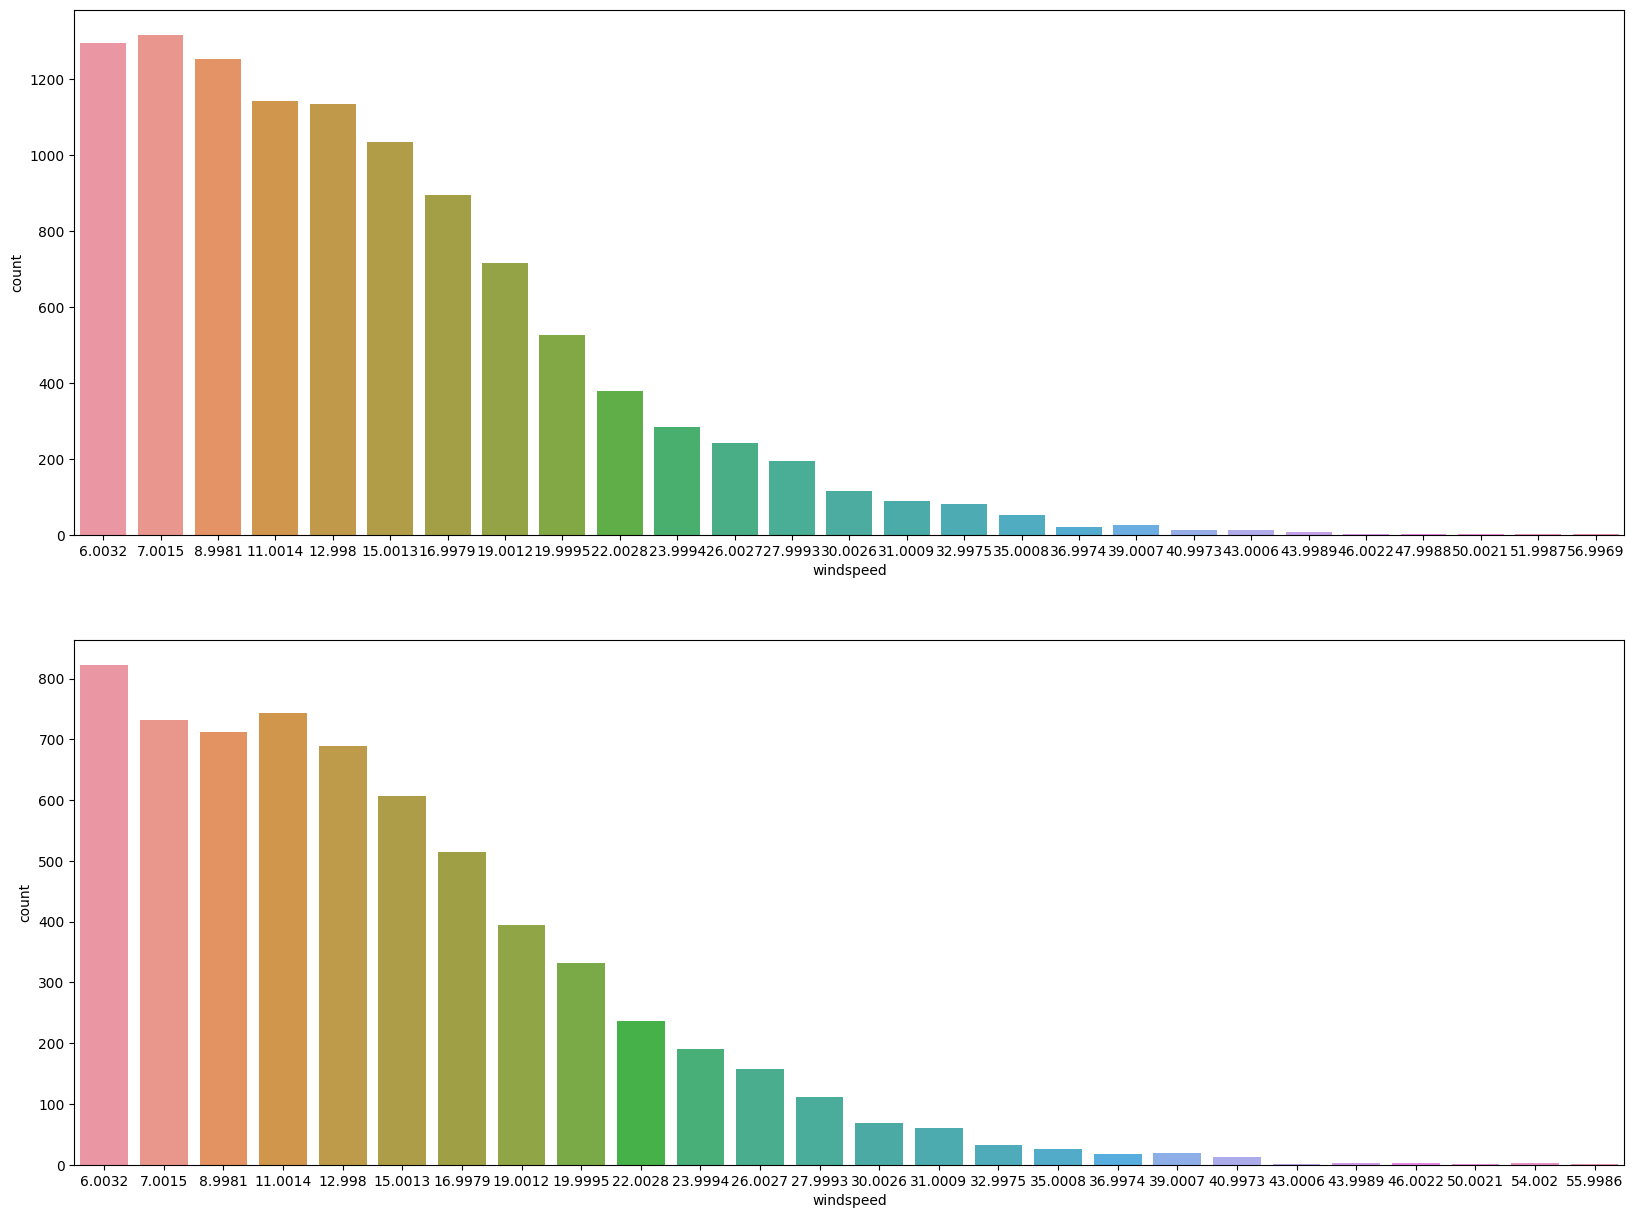

In [ ]:
# windspeed값 시각화
# 이렇게하면 안되네 countplot
# fig, ax = plt.subplots(2,1)
# ax[0].countplot(data = train, x = 'windspeed')
# ax[1].countplot(data = test, x = 'windspeed')

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)

#갯수를 세야하니 countplot
sns.countplot(data = train, x = 'windspeed', ax = ax1)
sns.countplot(data = test, x = 'windspeed', ax = ax2)

# 이제 모델링!
(혹시 원핫인코딩으로 하고싶다면 아래 방법 지금은 label인코딩)

또 그러면 의문점이 생긴다. 하나의 컬럼 안에 사과=1, 배=2, 딸기=3로 해주면 안될까??

이렇게 생긴 컬럼을 머신러닝 알고리즘에 그대로 넣어 데이터를 예측 하라고 지시한다면 컴퓨터가 이들 값의 관계를 예상과 다르게 형성할 가능성이 있다.( 사과, 배 , 딸기 따로이지만, 사과+배=딸기 로 인식할 수 있기 때문에 원핫 인코딩을 써주는 거다!)

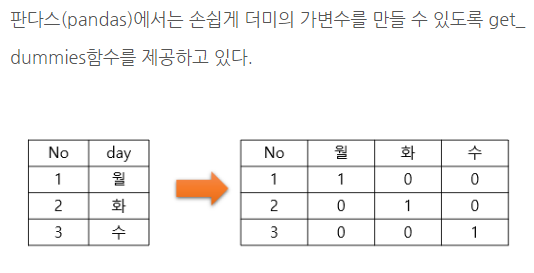

In [ ]:
pd.get_dummies(train['weather'], prefix='weather') # prefix는 weather1,2,3,4로 알아서 컬럼명써주는것

,weather_1,weather_2,weather_3,weather_4
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
10841,0,1,0,0
10842,0,1,0,0
10843,1,0,0,0
10844,1,0,0,0


In [ ]:
train = pd.get_dummies(train, columns = ['weather'], prefix = 'weather')
train = pd.get_dummies(train, columns = ['season'], prefix = 'season')
train = pd.get_dummies(train, columns = ['holiday'], prefix = 'holiday')

test = pd.get_dummies(test, columns = ['weather'], prefix = 'weather')
test = pd.get_dummies(test, columns = ['season'], prefix = 'season')
test = pd.get_dummies(test, columns = ['holiday'], prefix = 'holiday')

In [ ]:
train.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek', 'count_log', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')

In [ ]:
test.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')

# 모델링
일단 workingday는 holiday 와 너무 비슷한 양상을 띄고 있어서 workiingday를 삭제해주기로 했다. 또 temp와 atemp의 상관관계가 매우 높아 다중공선성이 의심됐기 때문에, atemp 변수를 삭제해 주었다. year, month, day 등 시간에 대한 변수가 따로 존재하기때문에 datetime 도 삭제해주고, 초단위, 분단위에 따른 자전거 수요량의 변화는 알기 쉽지 않다고 판단하여 없애 주었다. 따라서 최종적으로 선정하게된 컬럼은 아래와 같다.

- casual, registered도 볼필요없다 합계인 count예측할거라

In [ ]:
test_datetime = test['datetime']

train.drop(['datetime', 'workingday', 'atemp', 'registered', 'casual', 'minute', 'second'], axis = 1, inplace = True)
test.drop(['datetime', 'workingday', 'atemp', 'minute', 'second'], axis = 1, inplace = True)

In [ ]:
train.columns

Index(['temp', 'humidity', 'windspeed', 'count', 'year', 'month', 'day',
       'hour', 'dayofweek', 'count_log', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4',
       'holiday_0', 'holiday_1'],
      dtype='object')

In [ ]:
test.columns

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1'],
      dtype='object')

In [ ]:
# feature는 array 2차원 배열이어야한다!
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train = train.drop('count_log', axis = 1).values # label열 제외하고 X
target_label = train['count_log'].values # label열따로떼어서 Y
x_test = test.values

# train : val = 0.8 : 0.2 로 split
x_train, x_val, y_train, y_val = train_test_split(x_train, target_label, test_size = 0.2, random_state = 2000)

In [ ]:
x_train

array([[32.8   , 49.    ,  7.0015, ...,  0.    ,  1.    ,  0.    ],
       [13.12  , 45.    , 16.9979, ...,  1.    ,  1.    ,  0.    ],
       [26.24  , 73.    ,  6.0032, ...,  0.    ,  1.    ,  0.    ],
       ...,
       [22.96  , 37.    , 19.0012, ...,  0.    ,  1.    ,  0.    ],
       [18.86  , 63.    ,  8.9981, ...,  1.    ,  1.    ,  0.    ],
       [17.22  , 38.    , 19.9995, ...,  0.    ,  1.    ,  0.    ]])

In [ ]:
x_val

array([[20.5   , 72.    , 12.998 , ...,  1.    ,  1.    ,  0.    ],
       [30.34  , 51.    , 22.0028, ...,  0.    ,  1.    ,  0.    ],
       [12.3   , 61.    ,  6.0032, ...,  1.    ,  1.    ,  0.    ],
       ...,
       [13.12  , 70.    , 11.0014, ...,  1.    ,  1.    ,  0.    ],
       [ 9.84  , 93.    ,  6.0032, ...,  1.    ,  1.    ,  0.    ],
       [26.24  , 83.    ,  7.0015, ...,  0.    ,  1.    ,  0.    ]])

In [ ]:
y_train

array([5.64897424, 5.68697536, 5.79301361, ..., 5.01727984, 6.07073773,
       4.61512052])

In [ ]:
y_val

array([6.24610677, 5.24702407, 4.69134788, ..., 2.99573227, 1.38629436,
       1.38629436])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(
    # paremeter는 내가 직접 바꾸어보았다. 블로그의 결과와 성능차이 있을까?
      n_estimators = 1000,
			learning_rate = 0.05,
      max_depth = 5,
      random_state = 42
)

In [ ]:
regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=1000,
                          random_state=42)

In [ ]:
# score로 성능평가
print(regressor.score(x_train, y_train), regressor.score(x_val, y_val))

0.9999999722629354 0.9999998278601203


In [ ]:
regressor = GradientBoostingRegressor(
    # paremeter는 내가 직접 바꾸어보았다. 블로그의 결과와 성능차이 있을까?
      n_estimators = 1000,
			learning_rate = 0.05,
      max_depth = 5,
      min_samples_leaf = 15,
      min_samples_split = 10,
      random_state = 42
)

regressor.fit(x_train, y_train)

print(regressor.score(x_train, y_train), regressor.score(x_val, y_val))

0.9999994413975358 0.9999996126344223


# 블로그의 결과가 더 좋아보인다. 나는 train 정확도가 너무 높은걸로 보아 과대적합 된 것 같다.

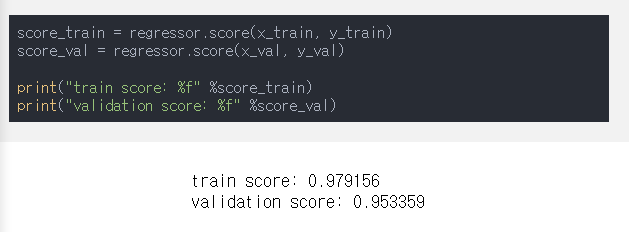

In [ ]:
# 예측후 파일생성하면된다!
# 원래는 test도 label이 주어지지만 캐글 대회문제라 정답은 가려놓았다!
# 내가 제출한 파일과 실제 값을 가지고 정확도를 판별할 것 같다.
pred = regressor.predict(x_test)

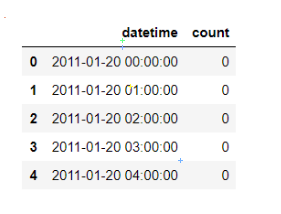

# 그림과 같은 형태로 제출해야 하기 때문에, 위에서 train_test_split할 때 따로 datetime저장해놨다.

In [ ]:
submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count_log'] = pred
# 이렇게 만들어서 제출하면 끝!

# 끝인것 같지면 이러면 진짜 망한다. 아까 log취해놔서 원래대로 되돌려주어야한다.
나는 이거 까먹을거같아서 아마 log정규화 애초에 안했을 것 같다..!
하지만 성능을 위해서라면 필수적으로 해야할 수도 있음⭐

In [ ]:
submission['count'] = np.exp(submission['count_log'])

submission.drop('count_log', axis = 1, inplace = True)
submission.head()
# 아래의 형태로 최종 제출하게 된다.

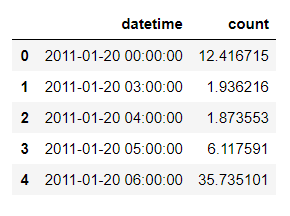